# Explore Questions

## #1 Which lesson appears to attract the most traffic consistently across cohorts (per program)?

#### Popular Lesson by Program - During enrollment
    java
        - java-i
        
    data science
        - fundamentals
        
    php
        - No Data
        
    fe
        - No Data
    



<img src="image/webdev.png" width="400" height="400" align='left'>

<img src="image/ds.png" width="400" height="400" align='left'>

    *Key Takaway*
    
    - For Web-Dev (java/php) Looks like java-i overall is the most popular lesson during enrollment.  
    - For Data Science fundamentals and classification are most popular during enrollment.
    - Seems that the earlier on lessons for web-dev and data science are really important and get referenced the most.


## #2 Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

    On the Web Dev side, the html lesson was referred significantly more by Ceres

<img src="image/htmlcss.png" width="400" height="400" align='left'>

    On the Data Science side, the classification lesson was referred significantly more by Darden

<img src="image/classification.png" width="400" height="400" align='left'>

    *Takeaway*
    
        - These numbers are based on requests while currently enrolled, not after graduating
        - There are more lessons showing this similar trend, I just focused on one lesson for each webdev and ds

### #3 Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

<img src="image/lowaccess.png" width="400" height="400" align='left'>

## Table of Low Access Students

<img src="image/table.png" width="250" height="250" align='left'>

    *Takeaway*
        
        - Low Access defined by less than 40 requests while currently enrolled
        - Low Access during currently enrolled, not after graduating.
        - Oberon had the most low access by percentage of class
        - Of the entire 952 students from each cohort, there are only 31 low access students.  Making up roughly 3% of the students.

### #4 Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

    I was able to find a lot of instances where large amounts of requests were done in a single day by a user_id.  One that stood out to me the most was:
    
    - Cohort Arches
    - ip address 108.199.117.96
    - user_id 313
    - requests 222
    - date 2018-12-19

### The incident im referencing on the graph below is the first Upper Outlier on the left side of the graph

<img src="image/a_scrap.png" width="400" height="400" align='left'>

### #5 What topics are grads continuing to reference after graduation and into their jobs (for each program)?

####  Popular Lesson by Program - After Graduating
    java
        - java-i
        - java-ii
        - html-css
        - mysql
        
    data science
        - fundamentals
        - sql
        
    php
        - java-i
        - java-ii
        - html-css
        - mysql
        
    fe
        - No Data
    




    *Takeaways*
    
    - For Data Science, fundamentals and sql, were the most popular but only have data from 3 of 5 cohorts
    - Web Dev, java 1 & 2 were at the top of the list

# Where the data from the graphs came from

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from wrangle import wrangle



In [10]:
df = wrangle()

In [11]:
# Creating an empty data base
cohort_df = pd.DataFrame(columns=['cohort','program','during', 'after', 'total', 'class_size',
                                  'low_access_during', 'low_access_percent', 'java_i',
                                 'java_ii', 'mysql', 'html_css', 'jquery', 'fundamentals', 'sql', 'classification'])

# iterate through each program
for program in list(df.program.unique()):
    
    # iterate through each cohort within the program
    for value in list(df[df.program == program].name.unique()):
        
        #create a temp dataframe of just the cohort we are looking at
        cohort = df[df.name == value]
        
        # Create cohort start date
        startstamp = cohort.start_date.value_counts().index[0]
        
        # Cretae cohort end date
        endstamp = cohort.end_date.value_counts().index[0]
        
        # Save the current program to program
        program = program
        
        # total = total amount of requests
        total = len(cohort[cohort.request_date_time >= startstamp])
        
        # during = requests during enrolled
        during = len(cohort[cohort.request_date_time <= endstamp])
        
        # after = requests after graduating 
        after = len(cohort[cohort.request_date_time > endstamp])
        
        # class_size of cohort
        class_size = cohort.user_id.nunique()
        
        # temp dataframe for enrollment periods 
        temp = cohort[cohort.request_date_time <= endstamp]
         
        # low_access_during enrollment where requests were less than 40
        low_access_during = len(temp.groupby('user_id').path.count()[temp.groupby('user_id').path.count() < 40])
        
        # grabbing the total of requests per lesson for java DURING enrollment
        java_i = (temp.url=='java-i').sum()
        java_ii = (temp.url=='java-ii').sum()
        mysql = (temp.url== 'mysql').sum()
        html_css = (temp.url== 'html-css').sum()
        jquery = (temp.url== 'jquery').sum()
        
         # grabbing the total of requests per lesson for data science DURING enrollment
        fundamentals = (temp.url=='fundamentals').sum()
        sql = (temp.url=='sql').sum()
        classification = (temp.url=='classification').sum()
        
        # appending to the empty dataframe created at the start
        cohort_df = cohort_df.append({'cohort':value, 'program':program, 'during': during, 'after':after, 'total':total,
                                      'class_size':class_size, 'low_access_during':low_access_during, 'java_i':java_i,
                                     'java_ii':java_ii, 'mysql':mysql, 'html_css':html_css, 'jquery':jquery,
                                      'fundamentals':fundamentals, 'sql':sql, 'classification':classification},  ignore_index=True)
    
# Creating new feature low_access/class_size
cohort_df['low_access_percent'] = round(((cohort_df.low_access_during/cohort_df.class_size)*100).astype('float'))

In [12]:
cohort_df

,cohort,program,during,after,total,class_size,low_access_during,low_access_percent,java_i,java_ii,mysql,html_css,jquery,fundamentals,sql,classification
0,Hampton,php,0,1502,1502,5,0,0.0,0,0,0,0,0,0,0,0
1,Arches,php,0,8264,8264,18,0,0.0,0,0,0,0,0,0,0,0
2,Quincy,php,0,1086,1086,16,0,0.0,0,0,0,0,0,0,0,0
3,Kings,php,0,2626,2626,9,0,0.0,0,0,0,0,0,0,0,0
4,Lassen,php,0,9462,9462,12,0,0.0,0,0,0,0,0,0,0,0
5,Glacier,php,0,547,547,6,0,0.0,0,0,0,0,0,0,0,0
6,Denali,php,0,3,3,1,0,0.0,0,0,0,0,0,0,0,0
7,Joshua,php,0,294,294,5,0,0.0,0,0,0,0,0,0,0,0
8,Olympic,php,0,4705,4705,13,0,0.0,0,0,0,0,0,0,0,0
9,Badlands,php,0,76,76,3,0,0.0,0,0,0,0,0,0,0,0


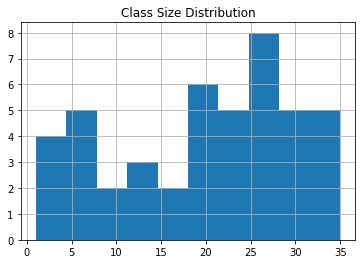

In [16]:
cohort_df.class_size.hist()
plt.title("Class Size Distribution")
plt.show()

Text(0.5, 1.0, 'Requests During Enrollment Distribution')

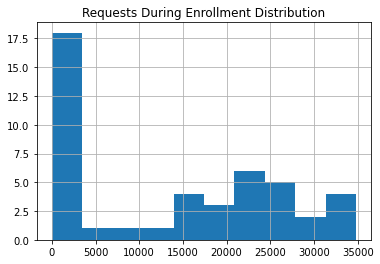

In [21]:
cohort_df.during.hist()
plt.title("Requests During Enrollment Distribution")

Text(0.5, 1.0, 'Requests After Graduation Distribution')

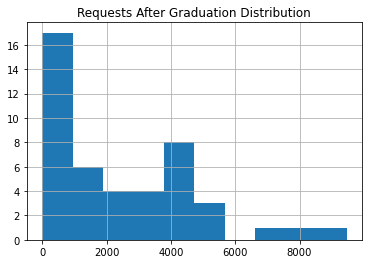

In [19]:
cohort_df.after.hist()
plt.title("Requests After Graduation Distribution")

Text(0.5, 1.0, 'Total Requests Distribution')

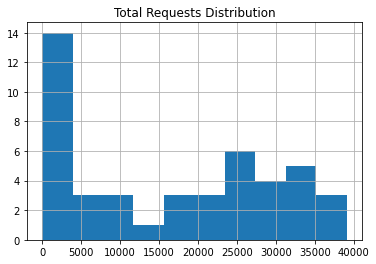

In [20]:
cohort_df.total.hist()
plt.title("Total Requests Distribution")

# Time Series Anomaly Detector

In [23]:
df = df.set_index('request_date_time').sort_index()

In [25]:
cohort_requests = df.groupby('name').resample('D').size().unstack(0)
cohort_requests.head(1)

name,Andromeda,Apex,Apollo,Arches,Badlands,Bash,Bayes,Betelgeuse,Ceres,Curie,...,Pinnacles,Quincy,Sequoia,Teddy,Ulysses,Voyageurs,Wrangell,Xanadu,Yosemite,Zion
request_date_time,,,,,,,,,,,,,,,,,,,,,
2018-01-26,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,158.0,301.0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
cohort_names = list(cohort_requests.columns)

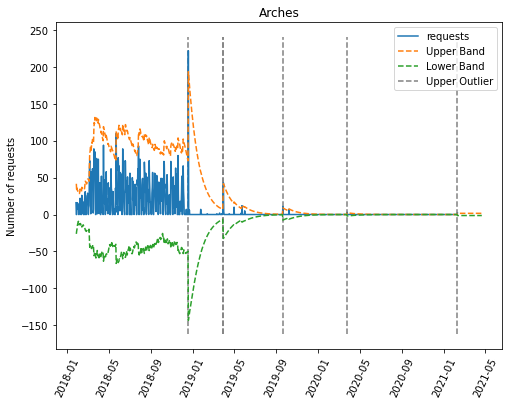

Arches
                       s    midband          ub          lb
request_date_time                                          
2018-12-19         222.0  25.113401  193.662473 -143.435671
2019-03-30          28.0   2.073119   23.862999  -19.716760
2019-03-31          43.0   4.713563   41.934244  -32.507118
2019-09-20          11.0   0.710292    8.959211   -7.538628
2020-03-25           3.0   0.193557    2.442524   -2.055411
2021-02-09           2.0   0.129032    1.628252   -1.370187


In [29]:
s = cohort_requests['Arches']
# set the window span
span = 30

# compute midband
midband = s.ewm(span=span).mean()

# compute exponential stdev
stdev = s.ewm(span=span).std()

ub = midband + stdev*3
lb = midband - stdev*3

bb = pd.concat([ub, lb], axis=1)

bb.columns = ['ub', 'lb']

my_df = pd.concat([s, midband, bb], axis=1)
my_df.columns = ['s', 'midband', 'ub', 'lb']
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(my_df.index, my_df.s, label='requests')

#ax.plot(my_df.index, my_df.midband, label = '30-day EMA/midband')
ax.plot(my_df.index, my_df.ub, label = 'Upper Band', ls='--')
ax.plot(my_df.index, my_df.lb, label = 'Lower Band', ls='--')

plt.vlines(my_df[my_df.s > ub].index, *plt.ylim(), color='grey', ls='--', label='Upper Outlier')

ax.legend(loc='best')
ax.set_ylabel('Number of requests')
plt.xticks(rotation = 65)
plt.title('Arches')

plt.show()

print("Arches")
print(my_df[my_df.s > ub])